# Aurora – Modelling Notebook

## Objectives
- Build and evaluate a machine learning pipeline for Ames Housing Price Prediction.

## Inputs
- Dataset: data/ames.csv

## Outputs
- Trained pipeline (models/)
- Metrics & plots (assets/)


In [30]:
import os

for folder in ["data", "models", "assets"]:
    os.makedirs(folder, exist_ok=True)

print("✅ Setup complete. Folders ready.")


✅ Setup complete. Folders ready.


In [31]:
import pandas as pd

CSV_PATH = "data/ames.csv"
df = pd.read_csv(CSV_PATH)

print("✅ Data loaded:", df.shape)
df.head()

✅ Data loaded: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
# Target variable summary
df["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [33]:
# Missing value percentages
df.isna().mean().sort_values(ascending=False).head(15)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Qual       0.054266
Garage Yr Blt     0.054266
Garage Cond       0.054266
Garage Finish     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Qual         0.027304
dtype: float64

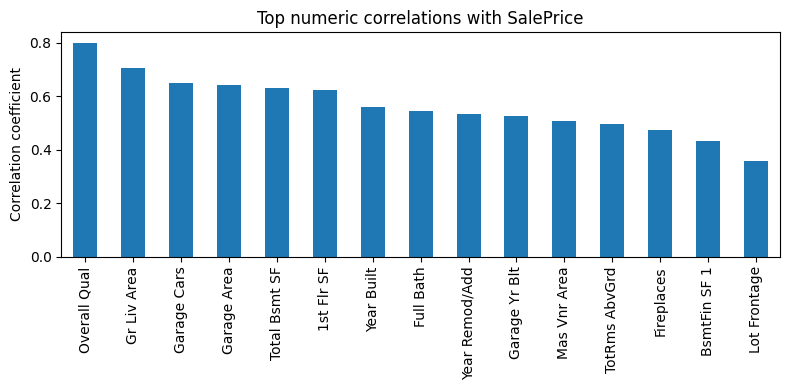

In [34]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns.tolist()
numeric_cols.remove("SalePrice")

corr = df[numeric_cols + ["SalePrice"]].corr()["SalePrice"].drop("SalePrice").sort_values(ascending=False)

plt.figure(figsize=(8,4))
corr.head(15).plot(kind="bar")
plt.title("Top numeric correlations with SalePrice")
plt.ylabel("Correlation coefficient")
plt.tight_layout()
plt.savefig("assets/top_corr_numeric.png", dpi=150)
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
y = df["SalePrice"].values
X = df.drop(columns=["SalePrice"])


In [10]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set size:", X_train.shape, " | Test set size:", X_test.shape)


Train set size: (2344, 81)  | Test set size: (586, 81)


In [11]:
# Identify feature types
num_features = X.select_dtypes(include="number").columns.tolist()
cat_features = X.select_dtypes(exclude="number").columns.tolist()

print("Numeric features:", len(num_features))
print("Categorical features:", len(cat_features))


Numeric features: 38
Categorical features: 43


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Numeric preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False))
])

# Categorical preprocessing
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer
preprocess = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# Model
model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

# Final pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", model)
])

pipe


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
# Train the pipeline
pipe.fit(X_train, y_train)

print("✅ Training complete.")


✅ Training complete.


In [19]:
from sklearn.metrics import r2_score
import json

# Predictions
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R² Train:", round(r2_train, 4))
print("R² Test :", round(r2_test, 4))


R² Train: 0.9836
R² Test : 0.9094


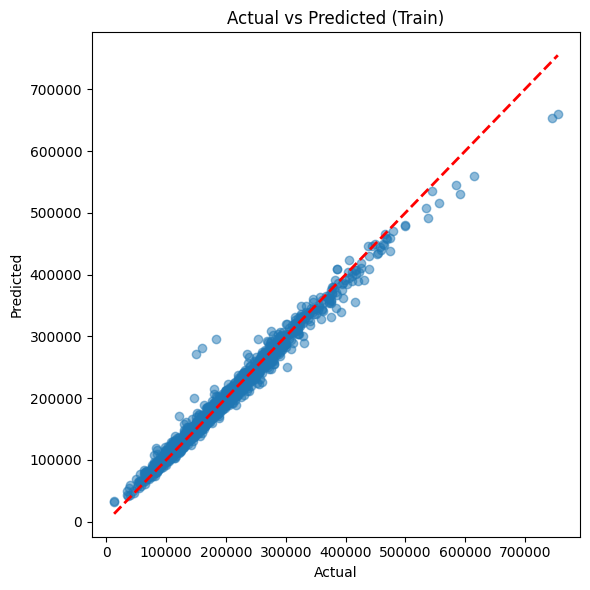

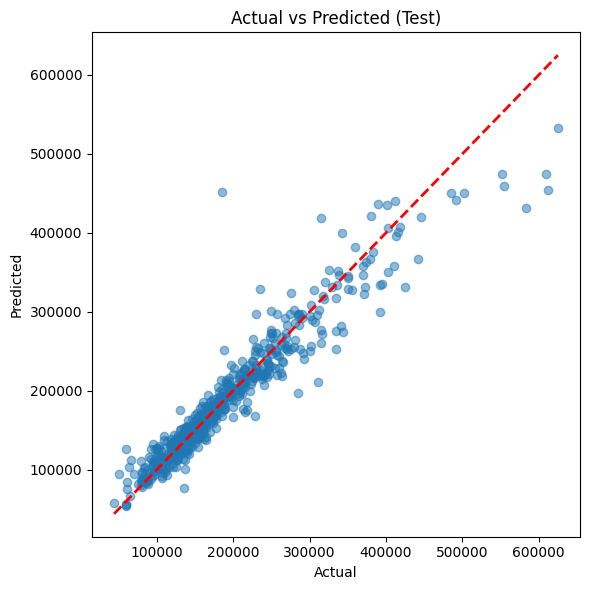

In [20]:
import matplotlib.pyplot as plt

def plot_actual_vs_pred(y_true, y_pred, title, filename):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             "r--", lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"assets/{filename}", dpi=150)
    plt.show()

plot_actual_vs_pred(y_train, y_pred_train, "Actual vs Predicted (Train)", "actual_vs_pred_train.png")
plot_actual_vs_pred(y_test, y_pred_test, "Actual vs Predicted (Test)", "actual_vs_pred_test.png")


In [21]:
metrics = {
    "r2_train": r2_train,
    "r2_test": r2_test
}

with open("assets/metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("✅ Metrics saved to assets/metrics.json")


✅ Metrics saved to assets/metrics.json


In [22]:
# Get feature names after preprocessing
ohe = pipe.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_ohe_features = ohe.get_feature_names_out(cat_features)

all_features = num_features + list(cat_ohe_features)
print("Total features after preprocessing:", len(all_features))


Total features after preprocessing: 302


In [23]:
importances = pipe.named_steps["model"].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

feat_imp.head(15)

Overall Qual      0.604034
Gr Liv Area       0.100673
1st Flr SF        0.039279
Total Bsmt SF     0.024796
2nd Flr SF        0.022451
BsmtFin SF 1      0.021912
Garage Cars       0.018069
Full Bath         0.015866
Lot Area          0.015125
Garage Area       0.014091
Year Built        0.009051
PID               0.008096
Year Remod/Add    0.007027
Lot Frontage      0.004476
Mas Vnr Area      0.004465
dtype: float64

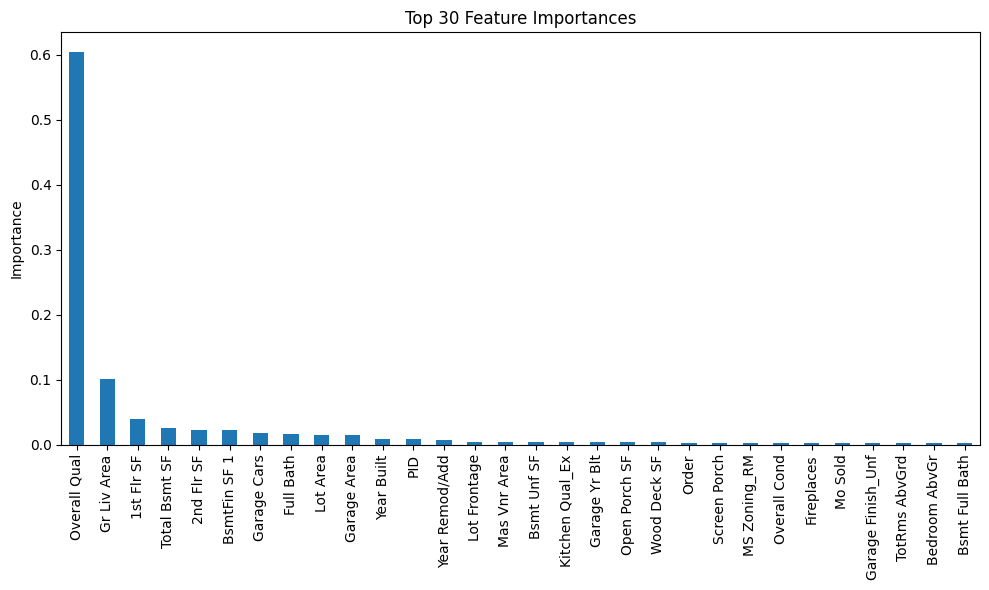

In [24]:
plt.figure(figsize=(10,6))
feat_imp.head(30).plot(kind="bar")
plt.title("Top 30 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.savefig("assets/feature_importance_top30.png", dpi=150)
plt.show()


In [25]:
import joblib

MODEL_PATH = "models/house_price_pipeline.joblib"
joblib.dump(pipe, MODEL_PATH)

print(f"✅ Model saved to {MODEL_PATH}")


✅ Model saved to models/house_price_pipeline.joblib


In [26]:
loaded_pipe = joblib.load(MODEL_PATH)
print("✅ Model reloaded successfully. Type:", type(loaded_pipe))


✅ Model reloaded successfully. Type: <class 'sklearn.pipeline.Pipeline'>


In [27]:
# Business success criterion: R² ≥ 0.75
success_train = r2_train >= 0.75
success_test = r2_test >= 0.75

if success_train and success_test:
    print(f"✅ Success! Model meets the criterion (Train: {r2_train:.3f}, Test: {r2_test:.3f})")
else:
    print(f"❌ Model does not meet the criterion (Train: {r2_train:.3f}, Test: {r2_test:.3f})")


✅ Success! Model meets the criterion (Train: 0.984, Test: 0.909)


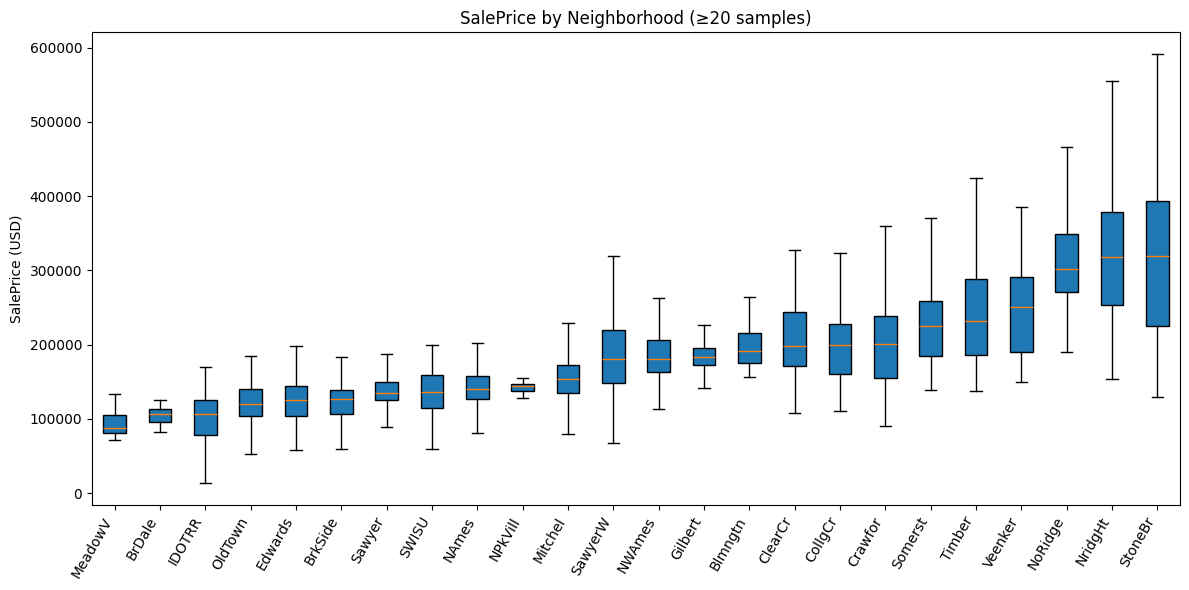

In [38]:
# ensure Neighborhood is present
assert "Neighborhood" in df.columns, "Neighborhood column not found."

# filter neighborhoods with enough samples
counts = df["Neighborhood"].value_counts()
valid_neigh = counts[counts >= 20].index

subset = df[df["Neighborhood"].isin(valid_neigh)].copy()

# order neighborhoods by median SalePrice (ascending)
order = subset.groupby("Neighborhood")["SalePrice"].median().sort_values().index

plt.figure(figsize=(12,6))
# pure matplotlib boxplot grouped by neighborhood
data_by_neigh = [subset.loc[subset["Neighborhood"] == n, "SalePrice"].dropna().values for n in order]

bp = plt.boxplot(data_by_neigh, vert=True, patch_artist=True, showfliers=False)
plt.xticks(range(1, len(order)+1), order, rotation=60, ha="right")
plt.ylabel("SalePrice (USD)")
plt.title("SalePrice by Neighborhood (≥20 samples)")
plt.tight_layout()
plt.savefig("assets/neighborhood_boxplot.png", dpi=150)
plt.show()


In [39]:
# --- Robust generator for assets/saleprice_hist.png ---
import os, sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Show where we are
print("CWD:", os.getcwd())

# 2) Verify df and column
try:
    _ = df  # should exist from earlier
except NameError:
    # fallback: load from default path if df isn't in memory yet
    CSV_PATH = "data/ames.csv"
    print(f"'df' not found in memory. Loading: {CSV_PATH}")
    df = pd.read_csv(CSV_PATH)

print("Has 'SalePrice'?", "SalePrice" in df.columns)
if "SalePrice" not in df.columns:
    print("Available columns sample:", df.columns.tolist()[:20])
    raise KeyError("SalePrice column not found. Check your CSV / column names.")

non_null = df["SalePrice"].notna().sum()
print("Non-null SalePrice rows:", non_null)

# 3) Ensure assets folder
assets_dir = Path("assets")
assets_dir.mkdir(exist_ok=True)
out_path = assets_dir / "saleprice_hist.png"
print("Will save to:", out_path.resolve())

# 4) Plot & save
plt.figure(figsize=(8,5))
plt.hist(df["SalePrice"].dropna(), bins=40)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(out_path, dpi=150)
plt.close()

# 5) Confirm
print("Saved?", out_path.exists(), "Size (bytes):", out_path.stat().st_size if out_path.exists() else 0)


CWD: C:\Users\Hallo\Desktop\aurora\notebooks
Has 'SalePrice'? True
Non-null SalePrice rows: 2930
Will save to: C:\Users\Hallo\Desktop\aurora\notebooks\assets\saleprice_hist.png
Saved? True Size (bytes): 24344
